# Оглавление
**Listener** - программа, что переводит записанное вами аудио на микрофон/диктофон в набор нот, после чего накладывает их на нотный стан, с точностью до длительности.

**Данный файл** предназначен для ознакомления программиста со структурой библиотек librosa, numpy, и для изучения основ работы со звуком и физики звука.
Текущие задачи:
    - Научиться определять ноту, созвучную с гармоникой другой ноты от двух созвучных гармоник (обертонов)
    - Научиться определять ноту по её обертонам
    - Структурировать уже существующий код
Импорт необходимых библиотек:

In [72]:
import librosa
import numpy as np
import librosa.display
from matplotlib import  pyplot as plt
import math

Загрузка файла и вывод основной информации.

In [73]:
audio_filename = 'f.wav'
sampling_rate = 48000
audio_file , sampling_rate = librosa.load(audio_filename,sr = sampling_rate)
print('Audio file type :', type(audio_file), '; Sample Rate type:', type(sampling_rate))
print('Audio file Shape:', audio_file.shape, '; Sample Rate =', sampling_rate)

duration = audio_file.shape[0]/sampling_rate
min = int(duration/60)
sec = int(duration-min*60)
print('Duration - {}:{} ({} sec)'.format(min,sec,duration))

Audio file type : <class 'numpy.ndarray'> ; Sample Rate type: <class 'int'>
Audio file Shape: (1167600,) ; Sample Rate = 48000
Duration - 0:24 (24.325 sec)


---  
Отрезаю лишь нужную часть аудио для текущей обработки, либо работаю с целым файлом.

    - hop_length уменьшает с ростом кол-во данных о синусоидах в единицу времени
    - n_fft увеличивает с ростом кол-во данных о каждой из частот

In [101]:
# start_sec = 65
# start_timestamp = int(sampling_rate*start_sec)
# ln = 6
# end_timestamp = int(start_timestamp + sampling_rate*ln)
# stft = librosa.stft(audio_file[start_timestamp:end_timestamp], n_fft = 2048*8, hop_length =1500)

stft= librosa.stft(audio_file, n_fft = 2**15, hop_length = int(duration*4)*100)
print(stft.shape)

(16385, 121)


**stft** - Матрица, хранящая децибелы в виде координаты [Частота, Фрейм]

Перевожу имеющиеся амплитудные данные в  Спектрограмму.

In [102]:
db = librosa.amplitude_to_db(abs(stft))

# plt.figure(figsize=(24, 10))
# plt.axis([0,96,0,1000])

# librosa.display.specshow(db, sr=sampling_rate, x_axis='time', y_axis='log',hop_length = int(duration*4)*39)
# plt.colorbar()

In [139]:
hz_scale = librosa.display.__mesh_coords('log', None, db.shape[0])

Пока-что очисткой от шумов будем считать удаление всех тех ячеек, где децибелы отрицательны

In [104]:
db[db < 0] = 0
# hz = 333
# plt.figure(figsize=(24, 10))
# plt.plot(db[round(hz * 11025 / 16384)+1])
# print(hz_scale[round(hz / (11025 / 16384))+1])

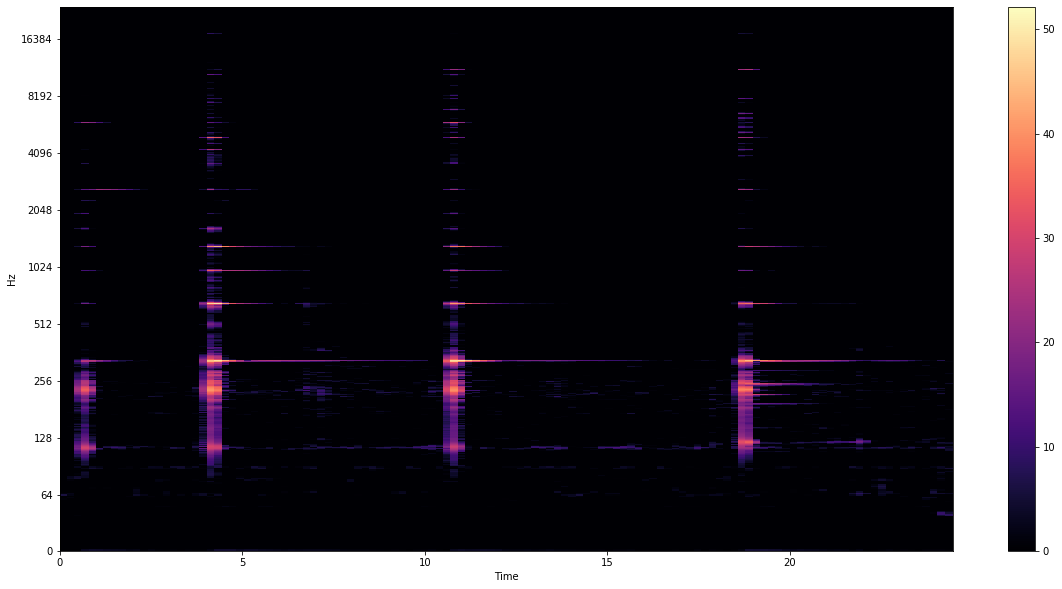

In [137]:
plt.figure(figsize=(20, 10))
librosa.display.specshow(db, sr=sampling_rate, x_axis='time', y_axis='log', hop_length = int(duration*4)*100)
plt.colorbar()

In [107]:
tdb = db.copy().transpose()

(121, 16385)


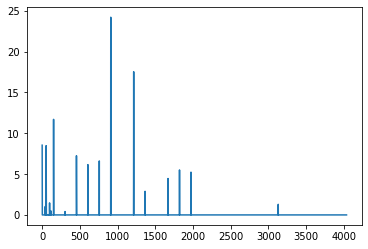

In [140]:
print(tdb.shape)
# plt.xscale('log')
xmax = 6000
frame = 8
plt.plot(hz_scale[1:xmax + 1],tdb[frame][:xmax])

Далее сделаем разделение данных на конкретные частоты, совпадающие с частотами нот в октавной системе

In [11]:
# tdb = db.copy().transpose()
# curr_frame = 0
# for i,_ in enumerate(tdb):
#     c = 2**(1 / 12)
    
#     # a = 12*math.log2(0.5 + c/2)
#     a = 1 / 2
#     # нужен общий вид параметра Б
#     b = 11025 / 16384;
    
#     # |[0,a] 2**(x/12) dx = |[a,1] 2**(x/12) dx
#     for j in range(-57,51):
#         curr_Hz    = 440 * (2**(j/12))
#         curr_frame = round(curr_Hz * b)
#     #     RadiusPositive, RadiusNegative
#         Rp = curr_Hz*a*(1 + c)
# #         Rn = curr_Hz*a*(1 + 1 / c)
#         Rn = curr_Hz*(1-a)*(1 + 1 / c)

#         left_Hz  = curr_Hz - Rn
#         right_Hz = curr_Hz + Rp

#         left_frame  = round(Rn * b) + 1
#         right_frame = round(Rp * b) - 1

#         new_val = getmax(tdb[i][left_frame:right_frame], tdb[i][curr_frame])
#         prev_Hz = curr_Hz* (2**(-1/12))
#         prev_frame = round(prev_Hz * b) +1
#         for frame in range(prev_frame, curr_frame):
#             tdb[i][frame] = 0
#         tdb[i][curr_frame] = new_val

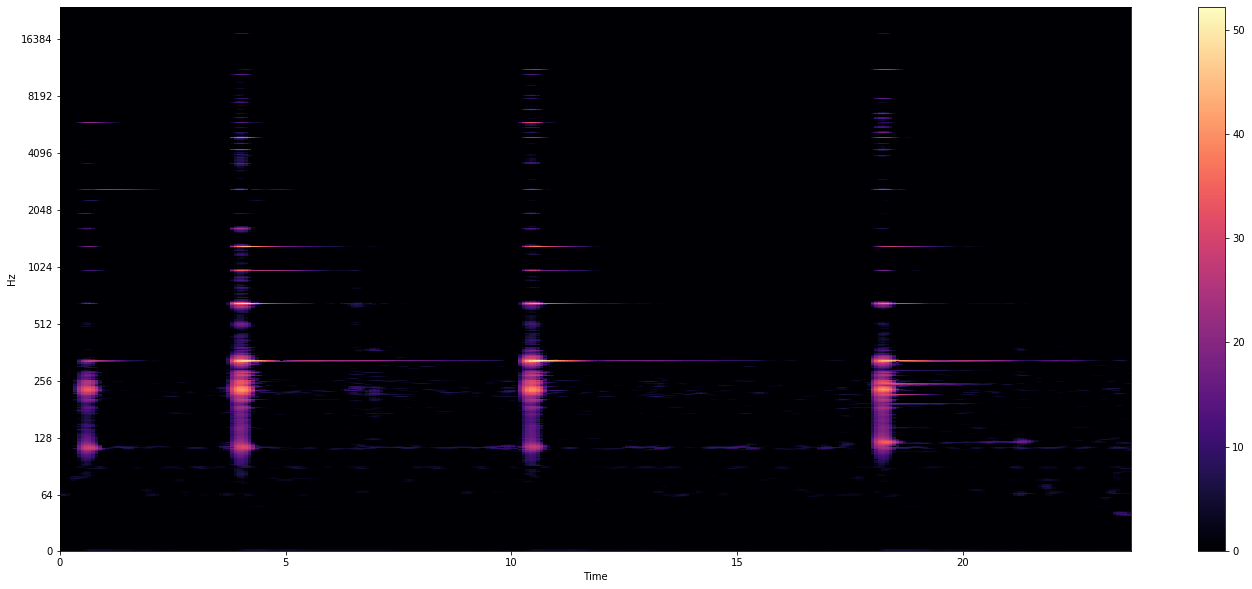

In [17]:
plt.figure(figsize=(24, 10))
librosa.display.specshow(db, sr=sampling_rate, x_axis='time', y_axis='log', hop_length = int(duration*4)*39)
plt.colorbar()

16386 (16385, 301)
1.336456298828125


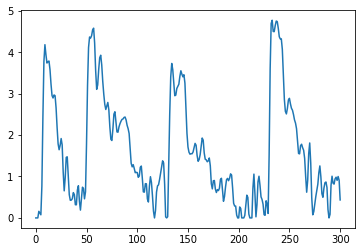

In [71]:
tdb = db.copy().transpose()
cur_time = 1
i = int(cur_time)
print(len(hz_scale),db.shape)
print (hz_scale[i]+1)
plt.plot(db[i])

In [38]:
audio_filename = 'output.wav'
sampling_rate = 44100
audio_file , sampling_rate = librosa.load(audio_filename,sr = sampling_rate)
print('Audio file type :', type(audio_file), '; Sample Rate type:', type(sampling_rate))
print('Audio file Shape:', audio_file.shape, '; Sample Rate =', sampling_rate)

duration = audio_file.shape[0]/sampling_rate
min = int(duration/60)
sec = int(duration-min*60)
print('Duration - {}:{} ({} sec)'.format(min,sec,duration))

Audio file type : <class 'numpy.ndarray'> ; Sample Rate type: <class 'int'>
Audio file Shape: (220500,) ; Sample Rate = 44100
Duration - 0:5 (5.0 sec)


In [41]:
stft= librosa.stft(audio_file, n_fft = 2**15, hop_length = int(duration*4)*40)
db = librosa.amplitude_to_db(abs(stft))
db[db<0] = 0

In [ ]:
def recodr_by_duration(sec):
    import os
    import sounddevice as sd
    from scipy.io.wavfile import write
    fs = 44100  # Частота дискретизации
    seconds = sec  # Продолжительность записи
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Дождитесь окончания записи
    write('output.wav', fs, myrecording)  # Сохранить как WAV файл
    return os.path.exists('output.wav')